<a href="https://colab.research.google.com/github/LxMera/Convolutional-Neural-Network-for-the-classification-of-independent-components-of-rs-fMRI/blob/master/Get_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Hand-Training Datasets
Here are data sets of the human connectome project manually classified for FIX.

https://www.fmrib.ox.ac.uk/datasets/FIX-training/

### Connected to Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install nilearn

import os
import cv2
import glob
import numpy as np
import scipy.io as sio
from nilearn import image
import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 2.5MB 10.2MB/s 


### Download data
\begin{bmatrix}
 & TR & Points & Points &  Points & Voxel-size & Field & Subjects & Shape\\ 
HCP-hp2000 & 0.7 & 1200 & - & - & 2×2×2mm & 3T & 100 & 91×109×91\\ 
HCP7T-hp2000 & 1.0 & - & - & - & 1.6×1.6×1.6mm & 7T &  &\\ 
Hand-clasifi & 2.0 & 242 & - & - & 3.4×3.4×3.0 mm & - &  &\\ 
Standar & 3.0 & 145 & 180 & 200 & 3.5×3.5×3.5mm & - &  &\\ 
Whii-MB6 & 1.3 & 460 & 1000 & - & 2×2×2mm & - & 39 & 106×106×72\\ 
Whii-Standar & 3.0 & 200 & - & - & 3×3×3mm & - &  &
\end{bmatrix}

In [0]:
gz=glob.glob('*.tar.gz')
files=np.shape(gz)[0]

if files==0:
  #Download
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs1-20.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs21-40.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs41-60.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs61-80.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_runs81-100.tar.gz')  
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/HCP_hp2000_run1.tar.gz')
  os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/WhII_MB6.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/WhII_Standard.tar.gz')
  #os.system('wget https://www.fmrib.ox.ac.uk/datasets/FIX-training/Standard.tar.gz')
else:
  print('The files already exist')

### Find .tar files

In [0]:
compri=glob.glob('*.tar.gz')
print('tar.gz files ', np.shape(compri)[0])

if os.path.exists('AllData'):
  print('The folder already exist')
else:
  print('creating folder...')
  os.system('mkdir AllData')
  print('...folder AllData created.')

tar.gz files  1
creating folder...
...folder AllData created.


### Unzip Data

In [0]:
files=glob.glob('AllData/*')
folde=np.shape(files)[0]

if folde==0:
  for i in compri:
    print('unziping '+i+' in AllData')
    os.system('tar -xzvf '+i+' -C AllData')
    print('remove '+i)
    os.system('rm -r '+i)
else: 
  print('folders already unzipped')

unziping WhII_MB6.tar.gz in AllData
remove WhII_MB6.tar.gz


### Groups

In [0]:
Carpetas=np.sort(glob.glob('AllData/*'))
print(Carpetas)

['AllData/WhII_MB6']


### Subjects

In [0]:
for car in Carpetas:
  sujetos=glob.glob(car+'/*')
  print(np.shape(sujetos)[0],'Sujects on ', car)

39 Sujects on  AllData/WhII_MB6


# Get Data

### Get PCA images in 3 axis

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

brain_pca = PCA(n_components=3)
scaler = StandardScaler()

def segmentationPCA(imagex,k):
  sag, cr, ax, cp=np.shape(imagex)
  if k>cp or k<0:
    print('The component number',str(k),' doesnt exist')
  #Axial
  brainF = np.zeros((1, sag*cr))
  ima3D=np.zeros((sag,cr,3))  
  for sl in range(ax):   
    slic=np.transpose(imagex[:,:,sl,k].flatten())
    brainF = np.concatenate((brainF,[slic]), axis=0)
  brainF=brainF[1:,:]  
  brain_pca.fit(brainF) 

  ima = np.transpose(brain_pca.components_)
  ima = np.transpose(scaler.fit_transform(ima))
  ima=(ima+1)*255/2
  ima[ima<0]=0
  ima[ima>255]=255 
  for chanel in range(3):
    ima3D[:,:,chanel]=ima[chanel].reshape(sag,cr)
  ima3D=np.array(ima3D, np.dtype('uint8'))

  #Coronal
  brainC = np.zeros((1, sag*ax))
  ima3C=np.zeros((sag,ax,3))  
  for sl in range(cr):    
    slic=np.transpose(imagex[:,sl,:,k].flatten())
    brainC = np.concatenate((brainC,[slic]), axis=0)
  brainC=brainC[1:,:]  
  brain_pca.fit(brainC) 

  imaC = np.transpose(brain_pca.components_)
  imaC = np.transpose(scaler.fit_transform(imaC))
  imaC=(imaC+1)*255/2
  imaC[imaC<0]=0
  imaC[imaC>255]=255 
  for chanel in range(3):
    ima3C[:,:,chanel]=imaC[chanel].reshape(sag,ax)
  ima3C=np.array(ima3C, np.dtype('uint8'))

  #Saggital
  brainS = np.zeros((1, cr*ax))
  ima3S=np.zeros((cr,ax,3))  
  for sl in range(sag):    
    slic=np.transpose(imagex[sl,:,:,k].flatten())
    brainS = np.concatenate((brainS,[slic]), axis=0)
  brainS=brainS[1:,:]  
  brain_pca.fit(brainS) 

  imaS = np.transpose(brain_pca.components_)
  imaS = np.transpose(scaler.fit_transform(imaS))
  imaS=(imaS+1)*255/2
  imaS[imaS<0]=0
  imaS[imaS>255]=255 
  for chanel in range(3):
    ima3S[:,:,chanel]=imaS[chanel].reshape(cr,ax)
  ima3S=np.array(ima3S, np.dtype('uint8'))
  
  return ima3D, ima3C, ima3S

In [0]:
def get_Axis(minx):
  Paxi=minx[0]
  Pcor=minx[1]
  Psag=minx[2]
  sg=Ds=cr=Dc=ax=Dx=0

  if Paxi[1]==Pcor[1] and Paxi[3]==Pcor[3]:
    sg=Paxi[1]
    Ds=Paxi[3]
  else:
    sg=np.min((Paxi[1],Pcor[1]))
    Ds=np.max((Paxi[3],Pcor[3]))

  if Paxi[0]==Psag[1] and Paxi[2]==Psag[3]:
    cr=Paxi[0]
    Dc=Paxi[2]
  else:
    cr=np.min((Paxi[0],Psag[1]))
    Dc=np.max((Paxi[2],Psag[3]))

  if Psag[0]==Pcor[0] and Psag[2]==Pcor[2]:
    ax=Pcor[0]
    Dx=Pcor[2]
  else:
    ax=np.min((Psag[0],Pcor[0]))
    Dx=np.max((Psag[2],Pcor[2]))
  return sg, Ds, cr, Dc, ax, Dx

In [0]:
def ContourVector(pro):
  ima1=cv2.cvtColor(pro, cv2.COLOR_RGB2GRAY)
  color=ima1[0,0]
  ima1=np.array((ima1!=color), np.dtype('uint8'))
  contours,_ = cv2.findContours(ima1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
  ind=0
  if np.shape(contours)[0]!=1:
    mx=[]
    for xi in range(np.shape(contours)[0]):
      area=cv2.contourArea(contours[xi])
      mx.append(area)
    ind=np.argmax(mx)
  cont=contours[ind]
  return cont

In [0]:
def getContours(im1, im2, im3):
  con1=ContourVector(im1)
  con2=ContourVector(im2)
  con3=ContourVector(im3)
  
  return con1, con2, con3

In [0]:
def ContourIma(con, ima):
  pro=ima.copy()
  pro=cv2.drawContours(pro, [con], 0, (0,0,255), 1)
  return pro

In [0]:
def rectangles(con1, con2, con3):
  Ax= cv2.boundingRect(con1)
  Cr= cv2.boundingRect(con2)
  Sg= cv2.boundingRect(con3)
  return Ax, Cr, Sg

In [0]:
#Saggital, coronal, axial
roundV=np.vectorize(round)
vecInt=np.vectorize(int)
def positions(rx):
  vS=vecInt(roundV(np.arange(rx[1]/48,rx[1],rx[1]/24.)))
  vC=vecInt(roundV(np.arange(rx[3]/48,rx[3],rx[3]/24.)))
  vA=vecInt(roundV(np.arange(rx[5]/48,rx[5],rx[5]/24.)))
  return vS, vC, vA

### Get image RGB 

In [0]:
kernel=np.ones((4,4))
umb=2
def CompressVolumen(im,cmp,roi3):
  sag, cr, ax, cp=np.shape(im)

  vecs, vecc, veca=positions(roi3)
  veca=veca+roi3[4]
  vecc=vecc+roi3[2]
  vecs=vecs+roi3[0]
  #Axial
  ima3D=np.zeros((sag,cr,3), np.dtype('uint8'))
  for z in range(8):
    val=2**z
    bina0=np.array((im[:,:,veca[z],cmp]>umb)*val, np.dtype('uint8'))
    bina0 = cv2.morphologyEx(bina0, cv2.MORPH_CLOSE, kernel)
    ima3D[:,:,0]=ima3D[:,:,0]+bina0

    bina1=np.array((im[:,:,veca[8+z],cmp]>umb)*val, np.dtype('uint8'))
    bina1 = cv2.morphologyEx(bina1, cv2.MORPH_CLOSE, kernel)
    ima3D[:,:,1]=ima3D[:,:,1]+bina1

    bina2=np.array((im[:,:,veca[16+z],cmp]>umb)*val, np.dtype('uint8'))
    bina2 = cv2.morphologyEx(bina2, cv2.MORPH_CLOSE, kernel)
    ima3D[:,:,2]=ima3D[:,:,2]+bina2

  #Coronal
  ima3C=np.zeros((sag,ax,3), np.dtype('uint8'))
  for z in range(8):
    val=2**z
    bina0=np.array((im[:,vecc[z],:,cmp]>umb)*val, np.dtype('uint8'))
    bina0 = cv2.morphologyEx(bina0, cv2.MORPH_CLOSE, kernel)
    ima3C[:,:,0]=ima3C[:,:,0]+bina0

    bina1=np.array((im[:,vecc[8+z],:,cmp]>umb)*val, np.dtype('uint8'))
    bina1 = cv2.morphologyEx(bina1, cv2.MORPH_CLOSE, kernel)
    ima3C[:,:,1]=ima3C[:,:,1]+bina1

    bina2=np.array((im[:,vecc[16+z],:,cmp]>umb)*val, np.dtype('uint8'))
    bina2 = cv2.morphologyEx(bina2, cv2.MORPH_CLOSE, kernel)
    ima3C[:,:,2]=ima3C[:,:,2]+bina2
  
  #sagittal
  ima3S=np.zeros((cr, ax,3), np.dtype('uint8'))
  for z in range(8):
    val=2**z
    bina0=np.array((im[vecs[z],:,:,cmp]>umb)*val, np.dtype('uint8'))
    bina0 = cv2.morphologyEx(bina0, cv2.MORPH_CLOSE, kernel)
    ima3S[:,:,0]=ima3S[:,:,0]+bina0

    bina1=np.array((im[vecs[8+z],:,:,cmp]>umb)*val, np.dtype('uint8'))
    bina1 = cv2.morphologyEx(bina1, cv2.MORPH_CLOSE, kernel)
    ima3S[:,:,1]=ima3S[:,:,1]+bina1

    bina2=np.array((im[vecs[16+z],:,:,cmp]>umb)*val, np.dtype('uint8'))
    bina2 = cv2.morphologyEx(bina2, cv2.MORPH_CLOSE, kernel)
    ima3S[:,:,2]=ima3S[:,:,2]+bina2
   
  return ima3D, ima3C, ima3S

In [0]:
def filterBlur(im1, im2, im3):
  i1=cv2.medianBlur(im1, 7)
  i2=cv2.medianBlur(im2, 7)
  i3=cv2.medianBlur(im3, 7)
  return i1, i2, i3

In [0]:
def axisImages(im,cpx):
  sag, cr, ax, cp=np.shape(im)
  sx=int(sag/2)
  cx=int(cr/2)
  xa=int(ax/2)

  mx=15
  mi=-2

  im[im>mx]=mx
  im[im<mi]=mi

  im3=np.array((im[sx,:,:,cpx]-mi)*255/(mx-mi), np.dtype('uint8'))
  im2=np.array((im[:,cx,:,cpx]-mi)*255/(mx-mi), np.dtype('uint8'))
  im1=np.array((im[:,:,xa,cpx]-mi)*255/(mx-mi), np.dtype('uint8'))

  im1=cv2.cvtColor(im1, cv2.COLOR_GRAY2RGB)
  im2=cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB)
  im3=cv2.cvtColor(im3, cv2.COLOR_GRAY2RGB)

  return im1, im2, im3

In [0]:
def ContourImages(im1, im2, im3, cn1, cn2, cn3):
  i1=ContourIma(cn1, im1)
  i2=ContourIma(cn2, im2)
  i3=ContourIma(cn3, im3)
  return i1, i2, i3

In [0]:
def CutImages(im1, im2, im3, minx):
  Paxi=minx[0]
  Pcor=minx[1]
  Psag=minx[2]
  
  i1=im1[Paxi[1]:Paxi[1]+Paxi[3],Paxi[0]:Paxi[0]+Paxi[2],:]
  i2=im2[Pcor[1]:Pcor[1]+Pcor[3],Pcor[0]:Pcor[0]+Pcor[2],:]
  i3=im3[Psag[1]:Psag[1]+Psag[3],Psag[0]:Psag[0]+Psag[2],:]

  return i1, i2, i3

In [0]:
def mainImages(prin, ncmp, fold, nome, sh=False, sav=False):
  imaA, imaC, imaS=segmentationPCA(prin,ncmp)

  conA, conC, conS=getContours(imaA, imaC, imaS)
  mini=rectangles(conA, conC, conS)
  roi=get_Axis(mini)

  CmaA, CmaC, CmaS=CompressVolumen(prin,ncmp,roi)
  fmaA, fmaC, fmaS=filterBlur(CmaA, CmaC, CmaS)
  AmaA, AmaC, AmaS=axisImages(prin,ncmp)

  res=ContourImages(imaA, imaC, imaS, conA, conC, conS)
  res1=ContourImages(CmaA, CmaC, CmaS, conA, conC, conS)
  res2=ContourImages(fmaA, fmaC, fmaS, conA, conC, conS)
  res3=ContourImages(AmaA, AmaC, AmaS, conA, conC, conS)

  xes=CutImages(imaA, imaC, imaS, mini)
  xes1=CutImages(CmaA, CmaC, CmaS, mini)
  xes2=CutImages(fmaA, fmaC, fmaS, mini)
  xes3=CutImages(AmaA, AmaC, AmaS, mini)

  res=CutImages(res[0], res[1], res[2], mini)
  res1=CutImages(res1[0], res1[1], res1[2], mini)
  res2=CutImages(res2[0], res2[1], res2[2], mini)
  res3=CutImages(res3[0], res3[1], res3[2], mini)

  if sav:
    sio.savemat(fold+'/PCA/'+nome+'.mat', {'saggital': xes[2], 'coronal': xes[1], 'axial': xes[0]})
    sio.savemat(fold+'/COM/'+nome+'.mat', {'saggital': xes1[2], 'coronal': xes1[1], 'axial': xes1[0]})
    sio.savemat(fold+'/BLU/'+nome+'.mat', {'saggital': xes2[2], 'coronal': xes2[1], 'axial': xes2[0]})
    sio.savemat(fold+'/AXI/'+nome+'.mat', {'saggital': xes3[2], 'coronal': xes3[1], 'axial': xes3[0]})

    sio.savemat(fold+'/C_PCA/'+nome+'.mat', {'saggital': res[2], 'coronal': res[1], 'axial': res[0]})
    sio.savemat(fold+'/C_COM/'+nome+'.mat', {'saggital': res1[2], 'coronal': res1[1], 'axial': res1[0]})
    sio.savemat(fold+'/C_BLU/'+nome+'.mat', {'saggital': res2[2], 'coronal': res2[1], 'axial': res2[0]})
    sio.savemat(fold+'/C_AXI/'+nome+'.mat', {'saggital': res3[2], 'coronal': res3[1], 'axial': res3[0]})
  
  if sh:
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res[0]); plt.subplot(1,3,2); plt.imshow(res[1]); plt.subplot(1,3,3); plt.imshow(res[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res1[0]); plt.subplot(1,3,2); plt.imshow(res1[1]); plt.subplot(1,3,3); plt.imshow(res1[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res2[0]); plt.subplot(1,3,2); plt.imshow(res2[1]); plt.subplot(1,3,3); plt.imshow(res2[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res3[0]); plt.subplot(1,3,2); plt.imshow(res3[1]); plt.subplot(1,3,3); plt.imshow(res3[2]); 

    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes[0]); plt.subplot(1,3,2); plt.imshow(xes[1]); plt.subplot(1,3,3); plt.imshow(xes[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes1[0]); plt.subplot(1,3,2); plt.imshow(xes1[1]); plt.subplot(1,3,3); plt.imshow(xes1[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes2[0]); plt.subplot(1,3,2); plt.imshow(xes2[1]); plt.subplot(1,3,3); plt.imshow(xes2[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes3[0]); plt.subplot(1,3,2); plt.imshow(xes3[1]); plt.subplot(1,3,3); plt.imshow(xes3[2]); 

In [0]:
def mainImages2(prin, ncmp, fold, nome, sh=False, sav=False):
  imaA, imaC, imaS=segmentationPCA(prin,ncmp)

  conA, conC, conS=getContours(imaA, imaC, imaS)
  mini=rectangles(conA, conC, conS)
  roi=get_Axis(mini)

  CmaA, CmaC, CmaS=CompressVolumen(prin,ncmp,roi)
  fmaA, fmaC, fmaS=filterBlur(CmaA, CmaC, CmaS)
  AmaA, AmaC, AmaS=axisImages(prin,ncmp)

  res=ContourImages(imaA, imaC, imaS, conA, conC, conS)
  res1=ContourImages(CmaA, CmaC, CmaS, conA, conC, conS)
  res2=ContourImages(fmaA, fmaC, fmaS, conA, conC, conS)
  res3=ContourImages(AmaA, AmaC, AmaS, conA, conC, conS)

  xes=CutImages(imaA, imaC, imaS, mini)
  xes1=CutImages(CmaA, CmaC, CmaS, mini)
  xes2=CutImages(fmaA, fmaC, fmaS, mini)
  xes3=CutImages(AmaA, AmaC, AmaS, mini)

  res=CutImages(res[0], res[1], res[2], mini)
  res1=CutImages(res1[0], res1[1], res1[2], mini)
  res2=CutImages(res2[0], res2[1], res2[2], mini)
  res3=CutImages(res3[0], res3[1], res3[2], mini)

  if sav:
    cv2.imwrite(fold+'/PCA/Saggital/'+nome+'.png',xes[2]), cv2.imwrite(fold+'/PCA/Coronal/'+nome+'.png',xes[1]), cv2.imwrite(fold+'/PCA/Axial/'+nome+'.png',xes[0])
    cv2.imwrite(fold+'/COM/Saggital/'+nome+'.png',xes1[2]), cv2.imwrite(fold+'/COM/Coronal/'+nome+'.png',xes1[1]), cv2.imwrite(fold+'/COM/Axial/'+nome+'.png',xes1[0])
    cv2.imwrite(fold+'/BLU/Saggital/'+nome+'.png',xes2[2]), cv2.imwrite(fold+'/BLU/Coronal/'+nome+'.png',xes2[1]), cv2.imwrite(fold+'/BLU/Axial/'+nome+'.png',xes2[0])
    cv2.imwrite(fold+'/AXI/Saggital/'+nome+'.png',xes3[2]), cv2.imwrite(fold+'/AXI/Coronal/'+nome+'.png',xes3[1]), cv2.imwrite(fold+'/AXI/Axial/'+nome+'.png',xes3[0])

    cv2.imwrite(fold+'/C_PCA/Saggital/'+nome+'.png',res[2]), cv2.imwrite(fold+'/C_PCA/Coronal/'+nome+'.png',res[1]), cv2.imwrite(fold+'/C_PCA/Axial/'+nome+'.png',res[0])
    cv2.imwrite(fold+'/C_COM/Saggital/'+nome+'.png',res1[2]), cv2.imwrite(fold+'/C_COM/Coronal/'+nome+'.png',res1[1]), cv2.imwrite(fold+'/C_COM/Axial/'+nome+'.png',res1[0])
    cv2.imwrite(fold+'/C_BLU/Saggital/'+nome+'.png',res2[2]), cv2.imwrite(fold+'/C_BLU/Coronal/'+nome+'.png',res2[1]), cv2.imwrite(fold+'/C_BLU/Axial/'+nome+'.png',res2[0])
    cv2.imwrite(fold+'/C_AXI/Saggital/'+nome+'.png',res3[2]), cv2.imwrite(fold+'/C_AXI/Coronal/'+nome+'.png',res3[1]), cv2.imwrite(fold+'/C_AXI/Axial/'+nome+'.png',res3[0])
  
  if sh:
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res[0]); plt.subplot(1,3,2); plt.imshow(res[1]); plt.subplot(1,3,3); plt.imshow(res[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res1[0]); plt.subplot(1,3,2); plt.imshow(res1[1]); plt.subplot(1,3,3); plt.imshow(res1[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res2[0]); plt.subplot(1,3,2); plt.imshow(res2[1]); plt.subplot(1,3,3); plt.imshow(res2[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(res3[0]); plt.subplot(1,3,2); plt.imshow(res3[1]); plt.subplot(1,3,3); plt.imshow(res3[2]); 

    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes[0]); plt.subplot(1,3,2); plt.imshow(xes[1]); plt.subplot(1,3,3); plt.imshow(xes[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes1[0]); plt.subplot(1,3,2); plt.imshow(xes1[1]); plt.subplot(1,3,3); plt.imshow(xes1[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes2[0]); plt.subplot(1,3,2); plt.imshow(xes2[1]); plt.subplot(1,3,3); plt.imshow(xes2[2]); 
    plt.figure(figsize=(20,5)); plt.subplot(1,3,1); plt.imshow(xes3[0]); plt.subplot(1,3,2); plt.imshow(xes3[1]); plt.subplot(1,3,3); plt.imshow(xes3[2]); 

In [0]:
def folders(EXT, FX):
  os.system('mkdir '+EXT+FX) #folder name
  os.system('mkdir '+EXT+FX+'/PCA')
  os.system('mkdir '+EXT+FX+'/COM')
  os.system('mkdir '+EXT+FX+'/BLU')
  os.system('mkdir '+EXT+FX+'/AXI')
  os.system('mkdir '+EXT+FX+'/C_PCA')
  os.system('mkdir '+EXT+FX+'/C_COM')
  os.system('mkdir '+EXT+FX+'/C_BLU')
  os.system('mkdir '+EXT+FX+'/C_AXI')

  os.system('mkdir '+EXT+FX+'/PCA/Saggital')
  os.system('mkdir '+EXT+FX+'/COM/Saggital')
  os.system('mkdir '+EXT+FX+'/BLU/Saggital')
  os.system('mkdir '+EXT+FX+'/AXI/Saggital')
  os.system('mkdir '+EXT+FX+'/C_PCA/Saggital')
  os.system('mkdir '+EXT+FX+'/C_COM/Saggital')
  os.system('mkdir '+EXT+FX+'/C_BLU/Saggital')
  os.system('mkdir '+EXT+FX+'/C_AXI/Saggital')

  os.system('mkdir '+EXT+FX+'/PCA/Coronal')
  os.system('mkdir '+EXT+FX+'/COM/Coronal')
  os.system('mkdir '+EXT+FX+'/BLU/Coronal')
  os.system('mkdir '+EXT+FX+'/AXI/Coronal')
  os.system('mkdir '+EXT+FX+'/C_PCA/Coronal')
  os.system('mkdir '+EXT+FX+'/C_COM/Coronal')
  os.system('mkdir '+EXT+FX+'/C_BLU/Coronal')
  os.system('mkdir '+EXT+FX+'/C_AXI/Coronal')

  os.system('mkdir '+EXT+FX+'/PCA/Axial')
  os.system('mkdir '+EXT+FX+'/COM/Axial')
  os.system('mkdir '+EXT+FX+'/BLU/Axial')
  os.system('mkdir '+EXT+FX+'/AXI/Axial')
  os.system('mkdir '+EXT+FX+'/C_PCA/Axial')
  os.system('mkdir '+EXT+FX+'/C_COM/Axial')
  os.system('mkdir '+EXT+FX+'/C_BLU/Axial')
  os.system('mkdir '+EXT+FX+'/C_AXI/Axial')

### test

saggital, coronal, axial and components (102, 102, 102, 183)
Time points  1000


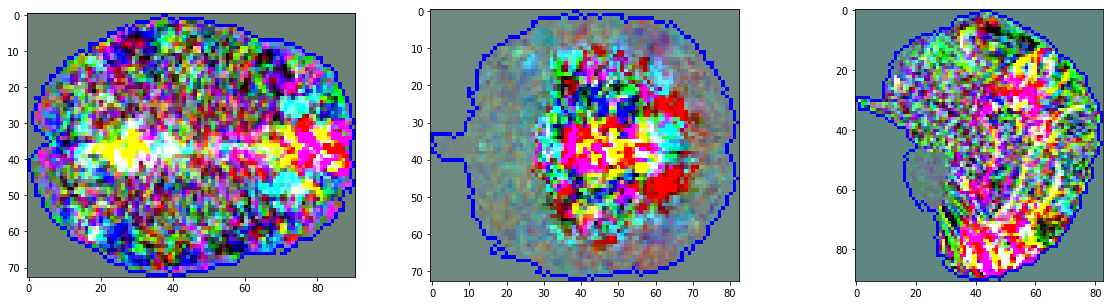

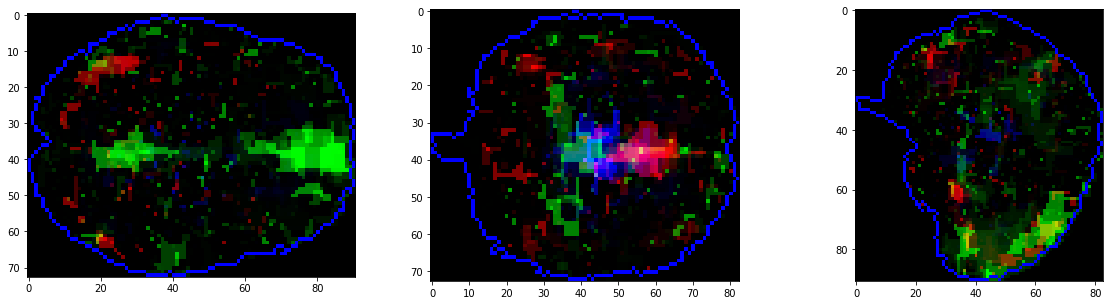

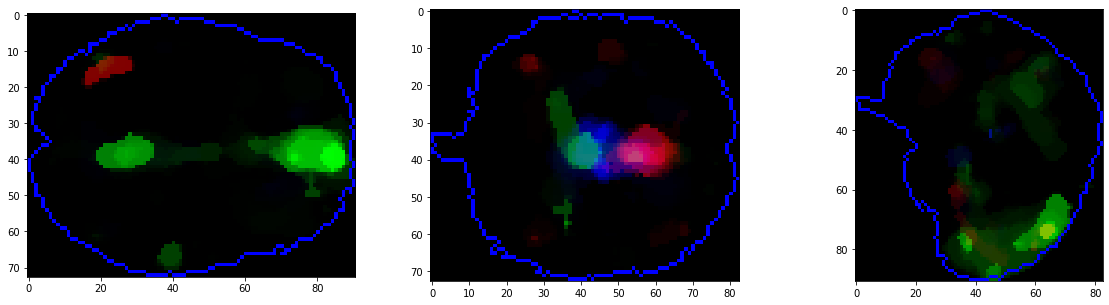

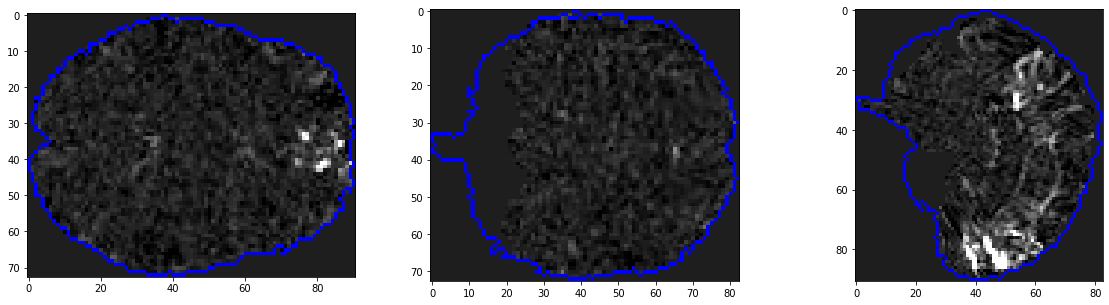

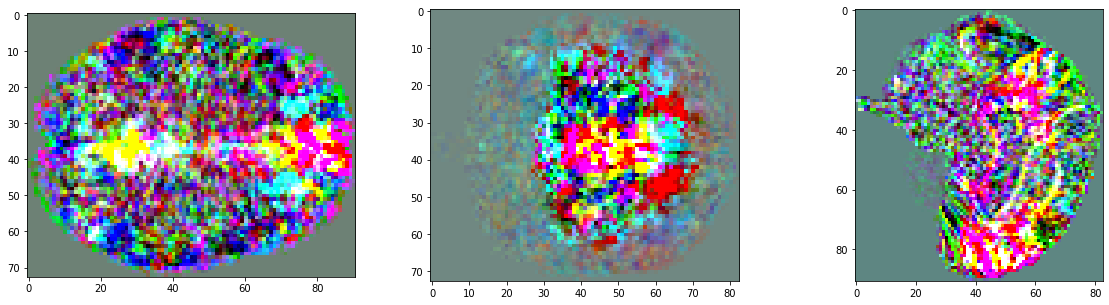

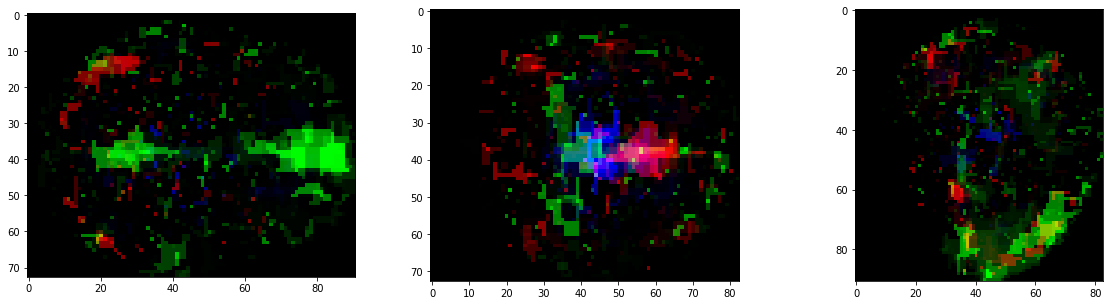

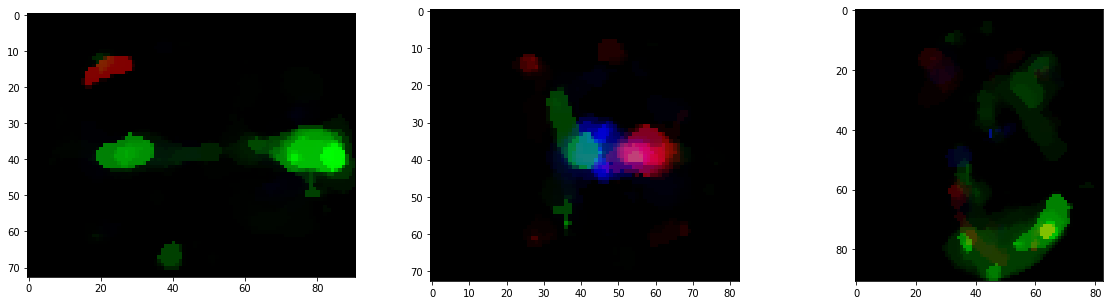

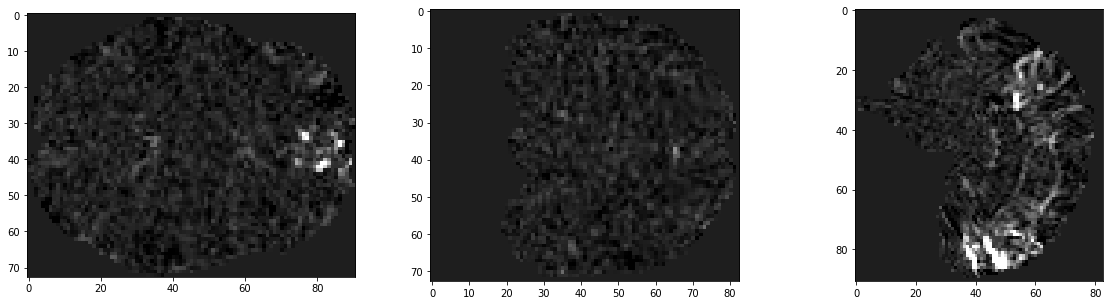

In [0]:
test=glob.glob('AllData/*/*.ica')[0]

img=image.image.load_img(test+'/filtered_func_data.ica/melodic_IC.nii.gz')      #Read data
series=np.loadtxt(test+"/filtered_func_data.ica/melodic_mix")                   #Read time serie
imasx=img.get_data()                                                            #Get volumen

print('saggital, coronal, axial and components', np.shape(imasx))
print('Time points ', np.shape(series)[0])

cp1=23
mainImages2(imasx, cp1, 'HCP_hp2000', 'sub-1-comp-23', True, False)

## Main - Extract all images

In [0]:
Tamanho=460
ext=str(Tamanho)
umb=2
compSub=[]
conver=np.vectorize(int)
AllData=np.zeros((Tamanho,1))
AllLabels=[]
orden=[]
Axis=[]

for fx in Carpetas:
  subjects=glob.glob(fx+'/*')
  subjects=np.sort(subjects)
  folders(ext, fx[8:])

  for sub in subjects:
    ##--------------------- Load signal time
    print(sub)
    series=np.loadtxt(sub+"/filtered_func_data.ica/melodic_mix")
    comp=np.shape(series)[1]
    print(comp)
    
    ##--------------------- Load melodic file (ICA)
    if np.shape(series)[0]==Tamanho:
      img=image.image.load_img(sub+"/filtered_func_data.ica/melodic_IC.nii.gz")    
      masx=img.get_data()

      ##--------------------- get and save images      
      for k in range(comp):
        name='sub-'+sub[len(fx)+1:-4]+'-comp-'+str(k)
        mainImages2(masx, k, ext+fx[8:], name, False, True)
        print('|', end ="")
        orden.append(name)
    
    ##--------------------- get labels 
    #print('Time and Components per subject ', np.shape(series))
    if np.shape(series)[0]==Tamanho:
      compSub.append(comp)
      #print('Time and Components per subject ', np.shape(series))
      label1=np.ones(comp)    
      AllData=np.concatenate((AllData,series), axis=1)
      
      #read labels
      f = open(sub+"/hand_labels_noise.txt") 
      while True:
        line = f.readline()
        if line=='':
          break
        handClas=line[1:-2]
      handClas= handClas.split(", ")
      handClas=conver(handClas)-1
      label1[handClas]=0
      AllLabels=np.concatenate((AllLabels, label1))
      #print('Noise per subject ', np.shape(handClas))
      f.close()
    
AllData=AllData[:,1:]
sio.savemat(ext+fx[8:]+'/Time.mat', {'series': AllData})
sio.savemat(ext+fx[8:]+'/Labels.mat', {'labels': AllLabels})
sio.savemat(ext+fx[8:]+'/Order.mat', {'order': orden})

|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB6/10.ica
145
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB6/11.ica
122
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB6/12.ica
150
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB6/13.ica
117
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB6/14.ica
100
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||AllData/WhII_MB

In [0]:
os.system('zip -r '+ext+Carpetas[0][8:]+'.zip '+ext+Carpetas[0][8:])
os.system('cp '+ext+Carpetas[0][8:]+'.zip drive/My\ Drive/WhitePro/'+ext+Carpetas[0][8:]+'.zip')